# Lab 6

In [29]:
# quiz question
def make_deck():
  suits = ['Clubs', 'Diamonds', 'Hearts', 'Spades']
  values = [2, 3, 4, 5, 6, 7, 8, 9, 10, 'Jack', 'Queen', 'King', 'Ace']
  deck = [(suit, value) for suit in suits for value in values]
  return deck

# testing
deck = make_deck()
print(deck)

[('Clubs', 2), ('Clubs', 3), ('Clubs', 4), ('Clubs', 5), ('Clubs', 6), ('Clubs', 7), ('Clubs', 8), ('Clubs', 9), ('Clubs', 10), ('Clubs', 'Jack'), ('Clubs', 'Queen'), ('Clubs', 'King'), ('Clubs', 'Ace'), ('Diamonds', 2), ('Diamonds', 3), ('Diamonds', 4), ('Diamonds', 5), ('Diamonds', 6), ('Diamonds', 7), ('Diamonds', 8), ('Diamonds', 9), ('Diamonds', 10), ('Diamonds', 'Jack'), ('Diamonds', 'Queen'), ('Diamonds', 'King'), ('Diamonds', 'Ace'), ('Hearts', 2), ('Hearts', 3), ('Hearts', 4), ('Hearts', 5), ('Hearts', 6), ('Hearts', 7), ('Hearts', 8), ('Hearts', 9), ('Hearts', 10), ('Hearts', 'Jack'), ('Hearts', 'Queen'), ('Hearts', 'King'), ('Hearts', 'Ace'), ('Spades', 2), ('Spades', 3), ('Spades', 4), ('Spades', 5), ('Spades', 6), ('Spades', 7), ('Spades', 8), ('Spades', 9), ('Spades', 10), ('Spades', 'Jack'), ('Spades', 'Queen'), ('Spades', 'King'), ('Spades', 'Ace')]


You are tasked with evaluating card counting strategies for black jack. In order to do so, you will use object oriented programming to create a playable casino style black jack game where a computer dealer plays against $n$ computer players and possibily one human player. If you don't know the rules of blackjack or card counting, please google it. 

A few requirements:
* The game should utilize multiple 52-card decks. Typically the game is played with 6 decks.
* Players should have chips.
* Dealer's actions are predefined by rules of the game (typically hit on 16). 
* The players should be aware of all shown cards so that they can count cards.
* Each player could have a different strategy.
* The system should allow you to play large numbers of games, study the outcomes, and compare average winnings per hand rate for different strategies.

1. Begin by creating a classes to represent cards and decks. The deck should support more than one 52-card set. The deck should allow you to shuffle and draw cards. Include a "plastic" card, placed randomly in the deck. Later, when the plastic card is dealt, shuffle the cards before the next deal.

In [1]:
import random

class Card:
    def __init__(self, suit, rank):
        self.suit = suit
        self.rank = rank
        self.value = self._get_value()

    def _get_value(self):
        if self.rank in ['J', 'Q', 'K']:
            return 10
        elif self.rank == 'A':
            return 11
        else:
            return int(self.rank)

    def __str__(self):
        return f"{self.rank} of {self.suit}"

class Deck:
    def __init__(self, num_decks=6):
        self.num_decks = num_decks
        self.cards = self._create_deck()
        self.plastic_card_index = random.randint(0, len(self.cards) - 1)  

    def _create_deck(self):
        suits = ['Hearts', 'Diamonds', 'Clubs', 'Spades']
        ranks = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K', 'A']
        cards = [Card(suit, rank) for _ in range(self.num_decks) for suit in suits for rank in ranks]
        return cards

    def shuffle(self):
        random.shuffle(self.cards)
        self.plastic_card_index = random.randint(0, len(self.cards) - 1) 

    def draw(self):
        card = self.cards.pop()
        if len(self.cards) == self.plastic_card_index: 
            self.shuffle()
        return card

In [2]:
# testing

deck = Deck(num_decks=2)  
deck.shuffle()  

# Draw 5 cards
for _ in range(5):
    card = deck.draw()
    print(card)  

print(f"\nDeck size: {len(deck.cards)}")

8 of Clubs
9 of Clubs
10 of Spades
A of Spades
10 of Diamonds

Deck size: 99


In [3]:
# testing
deck = Deck()
deck.shuffle()
print(deck.draw())

8 of Clubs


In [4]:
# testing 
card=Card('Hearts','A')
print(card)
print("Value:",card.value)

A of Hearts
Value: 11


2. Now design your game on a UML diagram. You may want to create classes to represent, players, a hand, and/or the game. As you work through the lab, update your UML diagram. At the end of the lab, submit your diagram (as pdf file) along with your notebook. 

3. Begin with implementing the skeleton (ie define data members and methods/functions, but do not code the logic) of the classes in your UML diagram.

In [5]:
class Card:
    def __init__(self, suit, rank):
        pass  

    def _get_value(self):
        pass

    def __str__(self):
        pass

class Deck:
    def __init__(self, num_decks=6):
        pass

    def _create_deck(self):
        pass

    def shuffle(self):
        pass

    def draw(self):
        pass

class Hand:
    def __init__(self):
        pass

    def add_card(self, card):
        pass

    def get_value(self):
        pass

class Player:
    def __init__(self, chips=100):
        pass

    def bet(self, amount):
        pass

    def hit(self, deck):
        pass

    def stay(self):
        pass

class HumanPlayer(Player):
    def __init__(self, chips=100):
        pass

    def make_decision(self):
        pass

class CountingPlayer(Player):
    def __init__(self, chips=100):
        pass

    def update_count(self, card):
        pass

    def make_decision(self):
        pass

class BasicStrategyPlayer(Player):
    def __init__(self, chips=100):
        pass
    def make_decision(self):
        pass


class Dealer:
    def __init__(self):
        pass

    def deal(self, deck, player):
        pass

    def hit(self, deck):
        pass
    
    def play(self, deck):
        pass

    def reveal_card(self):
        pass

    def get_hand_value(self):
        pass
    
class Game:
    def __init__(self, num_players=1):
        pass

    def start_game(self):
        pass

    def play_round(self):
        pass

    def determine_winner(self):
        pass

4. Complete the implementation by coding the logic of all functions. For now, just implement the dealer player and human player.

In [6]:

class Card:
    def __init__(self, suit, rank):
        self.suit = suit
        self.rank = rank
        self.value = self._get_value()
    def _get_value(self):
        if self.rank in ['J', 'Q', 'K']:
            return 10
        elif self.rank == 'A':
            return 11
        else:
            return int(self.rank)
    def __str__(self):
        return f"{self.rank} of {self.suit}"

class Deck:
    def __init__(self, num_decks=6):
        self.num_decks = num_decks
        self.cards = self._create_deck()
        self.plastic_card_index = random.randint(0, len(self.cards) - 1)
    def _create_deck(self):
        suits = ['Hearts', 'Diamonds', 'Clubs', 'Spades']
        ranks = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K', 'A']
        cards = [Card(suit, rank) for _ in range(self.num_decks) for suit in suits for rank in ranks]
        return cards
    def shuffle(self):
        random.shuffle(self.cards)
        self.plastic_card_index = random.randint(0, len(self.cards) - 1)
    def draw(self):
        card = self.cards.pop()
        if len(self.cards) == self.plastic_card_index:
            self.shuffle()
        return card

class Hand:
    def __init__(self):
        self.cards = []
        self.value = 0
        self.aces = 0

    def add_card(self, card):
        self.cards.append(card)
        self.value += card.value
        if card.rank == 'A':
            self.aces += 1
        self._adjust_for_ace()

    def get_value(self):
        return self.value

    def _adjust_for_ace(self):
        while self.value > 21 and self.aces:
            self.value -= 10
            self.aces -= 1

class Player:
    def __init__(self, chips=100):
        self.chips = chips
        self.hand = Hand()

    def bet(self, amount):
        if amount <= self.chips:
            self.chips -= amount
            return amount
        else:
            print("Insufficient chips!")
            return 0

    def hit(self, deck):
        card = deck.draw()
        self.hand.add_card(card)
        print(f"You drew: {card}")

    def stay(self):
        print("You stay.")

class HumanPlayer(Player):
    def make_decision(self):
        while True:
            decision = input("Hit or Stay? (h/s): ").lower()
            if decision in ['h', 's']:
                return decision
            else:
                print("Invalid input. Please enter 'h' or 's'.")

class Dealer:
    def __init__(self):
        self.hand = Hand()

    def deal(self, deck, player):
        for _ in range(2):
            player.hand.add_card(deck.draw())
            self.hand.add_card(deck.draw())

    def hit(self, deck):
        card = deck.draw()
        self.hand.add_card(card)
        print(f"Dealer drew: {card}")

    def play(self, deck):
        while self.hand.get_value() < 17:
            self.hit(deck)

    def reveal_card(self):
        print(f"Dealer's hidden card: {self.hand.cards[0]}")

    def get_hand_value(self):
        return self.hand.get_value()



In [7]:
# testing

deck = Deck()
deck.shuffle()

dealer = Dealer()
player = HumanPlayer()

# deal  initial hands
dealer.deal(deck, player) 

dealer.reveal_card()
print("Your hand:", [str(card) for card in player.hand.cards])
dealer.hit(deck)
print("Dealer's hand:", [str(card) for card in dealer.hand.cards])
dealer.hand.get_value()
print("Dealer's hand value:", dealer.hand.get_value())
player.hand.get_value()
print("Your hand value:", player.hand.get_value())

Dealer's hidden card: K of Clubs
Your hand: ['7 of Diamonds', '8 of Spades']
Dealer drew: 6 of Hearts
Dealer's hand: ['K of Clubs', 'Q of Clubs', '6 of Hearts']
Dealer's hand value: 26
Your hand value: 15


5.  Test. Demonstrate game play. For example, create a game of several dealer players and show that the game is functional through several rounds.

In [8]:

class Card:
    def __init__(self, suit, rank):
        self.suit = suit
        self.rank = rank
        self.value = self._get_value()
    def _get_value(self):
        if self.rank in ['J', 'Q', 'K']:
            return 10
        elif self.rank == 'A':
            return 11
        else:
            return int(self.rank)

    def __str__(self):
        return f"{self.rank} of {self.suit}"
class Deck:
    def __init__(self, num_decks=6):
        self.num_decks = num_decks
        self.cards = self._create_deck()
        self.plastic_card_index = random.randint(0, len(self.cards) - 1)
    def _create_deck(self):
        suits = ['Hearts', 'Diamonds', 'Clubs', 'Spades']
        ranks = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K', 'A']
        cards = [Card(suit, rank) for _ in range(self.num_decks) for suit in suits for rank in ranks]
        return cards
    def shuffle(self):
        random.shuffle(self.cards)
        self.plastic_card_index = random.randint(0, len(self.cards) - 1)
    def draw(self):
        card = self.cards.pop()
        if len(self.cards) == self.plastic_card_index:
            self.shuffle()
        return card
class Hand:
    def __init__(self):
        self.cards = []
        self.value = 0
        self.aces = 0
    def add_card(self, card):
        self.cards.append(card)
        self.value += card.value
        if card.rank == 'A':
            self.aces += 1
        self._adjust_for_ace()
    def get_value(self):
        return self.value
    def _adjust_for_ace(self):
        while self.value > 21 and self.aces:
            self.value -= 10
            self.aces -= 1
class Player:
    def __init__(self, chips=100):
        self.chips = chips
        self.hand = Hand()
    def bet(self, amount):
        if amount <= self.chips:
            self.chips -= amount
            return amount
        else:
            print("Insufficient chips!")
            return 0
    def hit(self, deck):
        card = deck.draw()
        self.hand.add_card(card)
        print(f"You drew: {card}")
    def stay(self):
        print("You stay.")
class HumanPlayer(Player):
    def make_decision(self):
        while True:
            decision = input("Hit or Stay? (h/s): ").lower()
            if decision in ['h', 's']:
                return decision
            else:
                print("Invalid input. Please enter 'h' or 's'.")
class Dealer:
    def __init__(self):
        self.hand = Hand()

    def deal(self, deck, player):
        for _ in range(2):
            player.hand.add_card(deck.draw())
            self.hand.add_card(deck.draw())
    def hit(self, deck):
        card = deck.draw()
        self.hand.add_card(card)
        print(f"Dealer drew: {card}")
    def play(self, deck):
        while self.hand.get_value() < 17:
            self.hit(deck)
    def reveal_card(self):
        print(f"Dealer's hidden card: {self.hand.cards[0]}")
    def get_hand_value(self):
        return self.hand.get_value()

### game
class Game:
    def __init__(self, num_players=1):
        self.deck = Deck()
        self.players = [HumanPlayer() for _ in range(num_players)]
        self.dealer = Dealer()
        
    def start_game(self):
        self.deck.shuffle()
        for player in self.players:
            self.dealer.deal(self.deck, player)
            print("Your hand:", [str(card) for card in player.hand.cards])
            print("Your hand value:", player.hand.get_value())  
        print("Dealer's face-up card:", [str(self.dealer.hand.cards[1])])

    def play_round(self):
        player = self.players[0]
        while player.hand.get_value() < 21:
            decision = player.make_decision()
            if decision == 'h':
                player.hit(self.deck)
                print("Your hand:", [str(card) for card in player.hand.cards])
                print("Your hand value:", player.hand.get_value())  
            else:
                player.stay()
                break
            if player.hand.get_value() > 21:
                print("You busted!")
                break

        if player.hand.get_value() <= 21:
            self.dealer.reveal_card()
            self.dealer.play(self.deck)
            print("Dealer's hand:", [str(card) for card in self.dealer.hand.cards])
            print("Dealer's hand value:", self.dealer.get_hand_value())  
            if self.dealer.hand.get_value() > 21:
                print("Dealer busted!")
        self.determine_winner(player)  

    def determine_winner(self, player):  
        if player.hand.get_value() > 21:
            print("Dealer wins!")
        elif self.dealer.hand.get_value() > 21:
            print("You win!")
        elif player.hand.get_value() > self.dealer.hand.get_value():
            print("You win!")
        elif player.hand.get_value() < self.dealer.hand.get_value():
            print("Dealer wins!")
        else:
            print("It's a push!")


In [10]:
# testing
game = Game()
game.start_game()
game.play_round()

Your hand: ['8 of Hearts', 'K of Diamonds']
Your hand value: 18
Dealer's face-up card: ['10 of Clubs']


Hit or Stay? (h/s):  s


You stay.
Dealer's hidden card: 5 of Hearts
Dealer drew: K of Hearts
Dealer's hand: ['5 of Hearts', '10 of Clubs', 'K of Hearts']
Dealer's hand value: 25
Dealer busted!
You win!


In [11]:
# testing 
game = Game(num_players=1)

# Play multiple rounds
num_rounds = 3  
for _ in range(num_rounds):
    print(f"\n--- Round {_ + 1} ---")
    game.start_game()
    game.play_round()
    # reset hands for new round
    for player in game.players:
        player.hand = Hand()  
    game.dealer.hand = Hand()  


--- Round 1 ---
Your hand: ['6 of Hearts', 'Q of Hearts']
Your hand value: 16
Dealer's face-up card: ['J of Hearts']


Hit or Stay? (h/s):  h


You drew: J of Spades
Your hand: ['6 of Hearts', 'Q of Hearts', 'J of Spades']
Your hand value: 26
You busted!
Dealer wins!

--- Round 2 ---
Your hand: ['Q of Diamonds', '6 of Hearts']
Your hand value: 16
Dealer's face-up card: ['Q of Spades']


Hit or Stay? (h/s):  s


You stay.
Dealer's hidden card: Q of Clubs
Dealer's hand: ['Q of Clubs', 'Q of Spades']
Dealer's hand value: 20
Dealer wins!

--- Round 3 ---
Your hand: ['2 of Diamonds', '9 of Spades']
Your hand value: 11
Dealer's face-up card: ['3 of Spades']


Hit or Stay? (h/s):  h


You drew: 3 of Clubs
Your hand: ['2 of Diamonds', '9 of Spades', '3 of Clubs']
Your hand value: 14


Hit or Stay? (h/s):  h


You drew: 10 of Diamonds
Your hand: ['2 of Diamonds', '9 of Spades', '3 of Clubs', '10 of Diamonds']
Your hand value: 24
You busted!
Dealer wins!


6. Implement a new player with the following strategy:

    * Assign each card a value: 
        * Cards 2 to 6 are +1 
        * Cards 7 to 9 are 0 
        * Cards 10 through Ace are -1
    * Compute the sum of the values for all cards seen so far.
    * Hit if sum is very negative, stay if sum is very positive. Select a threshold for hit/stay, e.g. 0 or -2.  

In [12]:
class Card:
    def __init__(self, suit, rank):
        self.suit = suit
        self.rank = rank
        self.value = self._get_value()
    def _get_value(self):
        if self.rank in ['J', 'Q', 'K']:
            return 10
        elif self.rank == 'A':
            return 11
        else:
            return int(self.rank)

    def __str__(self):
        return f"{self.rank} of {self.suit}"
class Deck:
    def __init__(self, num_decks=6):
        self.num_decks = num_decks
        self.cards = self._create_deck()
        self.plastic_card_index = random.randint(0, len(self.cards) - 1)
    def _create_deck(self):
        suits = ['Hearts', 'Diamonds', 'Clubs', 'Spades']
        ranks = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K', 'A']
        cards = [Card(suit, rank) for _ in range(self.num_decks) for suit in suits for rank in ranks]
        return cards
    def shuffle(self):
        random.shuffle(self.cards)
        self.plastic_card_index = random.randint(0, len(self.cards) - 1)
    def draw(self):
        card = self.cards.pop()
        if len(self.cards) == self.plastic_card_index:
            self.shuffle()
        return card
class Hand:
    def __init__(self):
        self.cards = []
        self.value = 0
        self.aces = 0
    def add_card(self, card):
        self.cards.append(card)
        self.value += card.value
        if card.rank == 'A':
            self.aces += 1
        self._adjust_for_ace()
    def get_value(self):
        return self.value
    def _adjust_for_ace(self):
        while self.value > 21 and self.aces:
            self.value -= 10
            self.aces -= 1
class Player:
    def __init__(self, chips=100):
        self.chips = chips
        self.hand = Hand()
    def bet(self, amount):
        if amount <= self.chips:
            self.chips -= amount
            return amount
        else:
            print("Insufficient chips!")
            return 0
    def hit(self, deck):
        card = deck.draw()
        self.hand.add_card(card)
        print(f"You drew: {card}")
    def stay(self):
        print("You stay.")
class HumanPlayer(Player):
    def make_decision(self):
        while True:
            decision = input("Hit or Stay? (h/s): ").lower()
            if decision in ['h', 's']:
                return decision
            else:
                print("Invalid input. Please enter 'h' or 's'.")
class Dealer:
    def __init__(self):
        self.hand = Hand()

    def deal(self, deck, player):
        for _ in range(2):
            player.hand.add_card(deck.draw())
            self.hand.add_card(deck.draw())
    def hit(self, deck):
        card = deck.draw()
        self.hand.add_card(card)
        print(f"Dealer drew: {card}")
    def play(self, deck):
        while self.hand.get_value() < 17:
            self.hit(deck)
    def reveal_card(self):
        print(f"Dealer's hidden card: {self.hand.cards[0]}")
    def get_hand_value(self):
        return self.hand.get_value()

class Game:
    def __init__(self, num_players=1):
        self.deck = Deck()
        self.players = [CountingPlayer() for _ in range(num_players)]  # use CountingPlayer
        self.dealer = Dealer()
    def start_game(self):
        self.deck.shuffle()
        for player in self.players:
            self.dealer.deal(self.deck, player)
            print("Your hand:", [str(card) for card in player.hand.cards])
            print("Your hand value:", player.hand.get_value())  
        print("Dealer's face-up card:", [str(self.dealer.hand.cards[1])])
    def play_round(self):
        for player in self.players:
             for card in self.dealer.hand.cards + player.hand.cards: 
                player.update_count(card) 

        player = self.players[0]
        while player.hand.get_value() < 21:
            decision = player.make_decision()
            if decision == 'h':
                player.hit(self.deck)
                print("Your hand:", [str(card) for card in player.hand.cards])
                print("Your hand value:", player.hand.get_value())  
            else:
                player.stay()
                break
            if player.hand.get_value() > 21:
                print("You busted!")
                break
        if player.hand.get_value() <= 21:
            self.dealer.reveal_card()
            self.dealer.play(self.deck)
            print("Dealer's hand:", [str(card) for card in self.dealer.hand.cards])
            print("Dealer's hand value:", self.dealer.get_hand_value())  
            if self.dealer.hand.get_value() > 21:
                print("Dealer busted!")
        self.determine_winner(player)  
    def determine_winner(self, player):  
        if player.hand.get_value() > 21:
            print("Dealer wins!")
        elif self.dealer.hand.get_value() > 21:
            print("You win!")
        elif player.hand.get_value() > self.dealer.hand.get_value():
            print("You win!")
        elif player.hand.get_value() < self.dealer.hand.get_value():
            print("Dealer wins!")
        else:
            print("It's a push!")
### q6
class CountingPlayer(Player):
    def __init__(self, chips=100):
        super().__init__(chips)
        self.count = 0 

    def update_count(self, card):
        if 2 <= card.value <= 6:
            self.count += 1
        elif card.value >= 10 or card.rank == 'A':
            self.count -= 1

    def make_decision(self):
        threshold = -2  
        if self.count <= threshold:
            print(f"Count: {self.count}, Hit")  
            return 'h'  # Hit
        else:
            print(f"Count: {self.count}, Stay")  
            return 's'  # Stay

In [13]:
# testing
game = Game(num_players=1) 
game.players[0] = CountingPlayer() 
game.start_game()  # deal initial hands
game.play_round()

Your hand: ['10 of Hearts', 'A of Spades']
Your hand value: 21
Dealer's face-up card: ['2 of Spades']
Dealer's hidden card: 9 of Diamonds
Dealer drew: 5 of Diamonds
Dealer drew: 6 of Diamonds
Dealer's hand: ['9 of Diamonds', '2 of Spades', '5 of Diamonds', '6 of Diamonds']
Dealer's hand value: 22
Dealer busted!
You win!


7. Create a test scenario where one player, using the above strategy, is playing with a dealer and 3 other players that follow the dealer's strategy. Each player starts with same number of chips. Play 50 rounds (or until the strategy player is out of money). Compute the strategy player's winnings. You may remove unnecessary printouts from your code (perhaps implement a verbose/quiet mode) to reduce the output.

In [14]:
class Card:
    def __init__(self, suit, rank):
        self.suit = suit
        self.rank = rank
        self.value = self._get_value()
    def _get_value(self):
        if self.rank in ['J', 'Q', 'K']:
            return 10
        elif self.rank == 'A':
            return 11
        else:
            return int(self.rank)
    def __str__(self):
        return f"{self.rank} of {self.suit}"
class Deck:
    def __init__(self, num_decks=6):
        self.num_decks = num_decks
        self.cards = self._create_deck()
        self.plastic_card_index = random.randint(0, len(self.cards) - 1)
    def _create_deck(self):
        suits = ['Hearts', 'Diamonds', 'Clubs', 'Spades']
        ranks = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K', 'A']
        cards = [Card(suit, rank) for _ in range(self.num_decks) for suit in suits for rank in ranks]
        return cards
    def shuffle(self):
        if not self.cards:  # Check if the deck is empty
            self.cards = self._create_deck()  # Recreate the deck
        random.shuffle(self.cards)
        self.plastic_card_index = random.randint(0, len(self.cards) - 1)
    def draw(self):
        card = self.cards.pop()
        if len(self.cards) == self.plastic_card_index:
            self.shuffle()
        return card
class Hand:
    def __init__(self):
        self.cards = []
        self.value = 0
        self.aces = 0
    def add_card(self, card):
        self.cards.append(card)
        self.value += card.value
        if card.rank == 'A':
            self.aces += 1
        self._adjust_for_ace()
    def get_value(self):
        return self.value
    def _adjust_for_ace(self):
        while self.value > 21 and self.aces:
            self.value -= 10
            self.aces -= 1
class Player:
    def __init__(self, chips=100):
        self.chips = chips
        self.hand = Hand()
    def bet(self, amount):
        if amount <= self.chips:
            self.chips -= amount
            return amount
        else:
            print("Insufficient chips!")
            return 0
    def hit(self, deck):
        card = deck.draw()
        self.hand.add_card(card)
        #print(f"You drew: {card}")
    def stay(self):
        pass
        #print("You stay.")

class HumanPlayer(Player):
    def make_decision(self):
        while True:
            decision = input("Hit or Stay? (h/s): ").lower()
            if decision in ['h', 's']:
                return decision
            else:
                print("Invalid input. Please enter 'h' or 's'.")
class Dealer:
    def __init__(self):
        self.hand = Hand()
    def deal(self, deck, player):
        for _ in range(2):
            player.hand.add_card(deck.draw())
            self.hand.add_card(deck.draw())
    def hit(self, deck):
        card = deck.draw()
        self.hand.add_card(card)
        #print(f"Dealer drew: {card}")
    def play(self, deck):
        while self.hand.get_value() < 17:
            self.hit(deck)
    def reveal_card(self):
        pass
        #print(f"Dealer's hidden card: {self.hand.cards[0]}")
    def get_hand_value(self):
        return self.hand.get_value()

class Game:
    def __init__(self, num_players=1):
        self.deck = Deck()
        self.players = [CountingPlayer() for _ in range(num_players)]
        self.dealer = Dealer()
    def start_game(self):
        self.deck.shuffle()
        for player in self.players:
            self.dealer.deal(self.deck, player)
            #print("Your hand:", [str(card) for card in player.hand.cards])
            #print("Your hand value:", player.hand.get_value())
        #print("Dealer's face-up card:", [str(self.dealer.hand.cards[1])])
    def play_round(self, verbose=True):  # Add verbose parameter with default value True
        for player in self.players:
            # Update count for CountingPlayers
            if isinstance(player, CountingPlayer):
                for card in self.dealer.hand.cards + player.hand.cards:
                    player.update_count(card)
        player = self.players[0]
        while player.hand.get_value() < 21:
            decision = player.make_decision()
            if decision == 'h':
                player.hit(self.deck)
                #print("Your hand:", [str(card) for card in player.hand.cards])
                #print("Your hand value:", player.hand.get_value())
            else:
                player.stay()
                break
            if player.hand.get_value() > 21:
                #print("You busted!")
                break
        if player.hand.get_value() <= 21:
            self.dealer.reveal_card()
            self.dealer.play(self.deck)
            #print("Dealer's hand:", [str(card) for card in self.dealer.hand.cards])
            #print("Dealer's hand value:", self.dealer.get_hand_value())
            if self.dealer.hand.get_value() > 21:
                pass
                #print("Dealer busted!")
        self.determine_winner(player, verbose)  # Pass verbose to determine_winner
    def determine_winner(self, player, verbose=True):  # Add verbose parameter to determine_winner
        if player.hand.get_value() > 21:
            print("Dealer wins!")
        elif self.dealer.hand.get_value() > 21:
            print("You win!")
        elif player.hand.get_value() > self.dealer.hand.get_value():
            print("You win!")
        elif player.hand.get_value() < self.dealer.hand.get_value():
            print("Dealer wins!")
        else:
            print("It's a push!")
class CountingPlayer(Player):
    def __init__(self, chips=100):
        super().__init__(chips)
        self.count = 0

    def update_count(self, card):
        if 2 <= card.value <= 6:
            self.count += 1
        elif card.value >= 10 or card.rank == 'A':
            self.count -= 1

    def make_decision(self):
        threshold = -2
        if self.count <= threshold:
            #print(f"Count: {self.count}, Hit")
            return 'h'  
        else:
            #print(f"Count: {self.count}, Stay")
            return 's'  
### q7         
class DealerPlayer(Player):  # New class for players following dealer's strategy
    def make_decision(self):
        if self.hand.get_value() < 17:
            return 'h'
        else:
            return 's'


In [20]:
# testing (print statements removed)

num_rounds = 50
initial_chips = 100

game = Game(num_players=4)  
game.players[0] = CountingPlayer(chips=initial_chips)  
game.players[1:] = [DealerPlayer(chips=initial_chips) for _ in range(3)]  

for _ in range(num_rounds):
    if game.players[0].chips <= 0:  
        break
    game.start_game()
    for card in game.dealer.hand.cards + game.players[0].hand.cards: 
        game.players[0].update_count(card)
    game.play_round(verbose=False)  
    for player in game.players:
        player.hand = Hand()  
    game.dealer.hand = Hand()  

counting_player_winnings = game.players[0].chips - initial_chips
print(f"CountingPlayer's winnings after {num_rounds} rounds (or until out of money): {counting_player_winnings}")

Dealer wins!
Dealer wins!
Dealer wins!
Dealer wins!
You win!
Dealer wins!
Dealer wins!
Dealer wins!
You win!
You win!
You win!
Dealer wins!
Dealer wins!
You win!
Dealer wins!
You win!
Dealer wins!
Dealer wins!
Dealer wins!
You win!
Dealer wins!
Dealer wins!
Dealer wins!
You win!
You win!
Dealer wins!
Dealer wins!
You win!
You win!
Dealer wins!
Dealer wins!
Dealer wins!
You win!
Dealer wins!
Dealer wins!
You win!
Dealer wins!
Dealer wins!
Dealer wins!
Dealer wins!
Dealer wins!
You win!
Dealer wins!
Dealer wins!
Dealer wins!
Dealer wins!
Dealer wins!
Dealer wins!
Dealer wins!
Dealer wins!
CountingPlayer's winnings after 50 rounds (or until out of money): 0


8. Create a loop that runs 100 games of 50 rounds, as setup in previous question, and store the strategy player's chips at the end of the game (aka "winnings") in a list. Histogram the winnings. What is the average winnings per round? What is the standard deviation. What is the probabilty of net winning or lossing after 50 rounds?


You win!
Dealer wins!
Dealer wins!
Dealer wins!
Dealer wins!
Dealer wins!
Dealer wins!
Dealer wins!
Dealer wins!
Dealer wins!
Dealer wins!
Dealer wins!
Dealer wins!
Dealer wins!
Dealer wins!
Dealer wins!
Dealer wins!
Dealer wins!
Dealer wins!
Dealer wins!
Dealer wins!
Dealer wins!
Dealer wins!
Dealer wins!
Dealer wins!
Dealer wins!
Dealer wins!
Dealer wins!
Dealer wins!
Dealer wins!
Dealer wins!
Dealer wins!
Dealer wins!
Dealer wins!
Dealer wins!
Dealer wins!
Dealer wins!
Dealer wins!
Dealer wins!
Dealer wins!
Dealer wins!
Dealer wins!
Dealer wins!
Dealer wins!
Dealer wins!
Dealer wins!
Dealer wins!
Dealer wins!
Dealer wins!
Dealer wins!
You win!
Dealer wins!
Dealer wins!
Dealer wins!
Dealer wins!
Dealer wins!
Dealer wins!
Dealer wins!
Dealer wins!
Dealer wins!
Dealer wins!
Dealer wins!
Dealer wins!
Dealer wins!
Dealer wins!
Dealer wins!
Dealer wins!
Dealer wins!
Dealer wins!
Dealer wins!
Dealer wins!
Dealer wins!
Dealer wins!
Dealer wins!
Dealer wins!
Dealer wins!
Dealer wins!
Dealer 

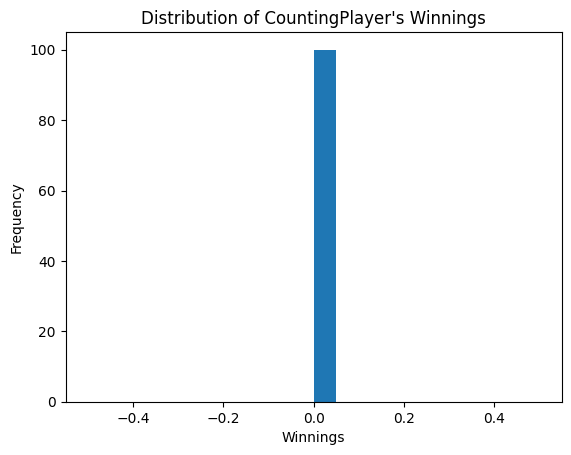

Average winnings per round: 0.00
Standard deviation of winnings: 0.00
Probability of winning after 50 rounds: 0.00
Probability of losing after 50 rounds: 1.00


In [21]:
import numpy as np
import matplotlib.pyplot as plt

num_games = 100
num_rounds = 50
initial_chips = 100

winnings_list = []

for _ in range(num_games):
    game = Game(num_players=4)
    game.players[0] = CountingPlayer(chips=initial_chips)
    game.players[1:] = [DealerPlayer(chips=initial_chips) for _ in range(3)]
    for _ in range(num_rounds):
        if game.players[0].chips <= 0:
            break
        game.start_game()
        game.play_round(verbose=False)
    winnings_list.append(game.players[0].chips - initial_chips)

# histogram of winnings
plt.hist(winnings_list, bins=20)
plt.xlabel("Winnings")
plt.ylabel("Frequency")
plt.title("Distribution of CountingPlayer's Winnings")
plt.show()

# avg winnings per round
average_winnings_per_round = np.mean(winnings_list) / num_rounds
print(f"Average winnings per round: {average_winnings_per_round:.2f}")

# Standard deviation
std_deviation = np.std(winnings_list)
print(f"Standard deviation of winnings: {std_deviation:.2f}")

# probability of winning/losing
num_winning_games = sum(1 for winnings in winnings_list if winnings > 0)
probability_of_winning = num_winning_games / num_games
print(f"Probability of winning after 50 rounds: {probability_of_winning:.2f}")
print(f"Probability of losing after 50 rounds: {1 - probability_of_winning:.2f}")


9. Repeat previous questions scanning the value of the threshold. Try at least 5 different threshold values. Can you find an optimal value?

In [25]:
# testing

num_games = 100
num_rounds = 50
initial_chips = 100
bet_amount = 10  

thresholds = [-5, -3, -1, 1, 3]  # Threshold values to test
optimal_threshold = None
max_avg_winnings = float('-inf')

for threshold in thresholds:
    winnings_list = []
    for _ in range(num_games):
        game = Game(num_players=4)
        # Set the threshold for the CountingPlayer
        counting_player = CountingPlayer(chips=initial_chips)
        counting_player.threshold = threshold  # current threshold 
        game.players[0] = counting_player
        game.players[1:] = [DealerPlayer(chips=initial_chips) for _ in range(3)]

        for _ in range(num_rounds):
            if game.players[0].chips <= 0:
                break
            game.start_game()
            # Make bets
            for player in game.players:
                player.bet(bet_amount)
            game.play_round(verbose=False)

        winnings_list.append(game.players[0].chips - initial_chips)

    avg_winnings = np.mean(winnings_list)
    if avg_winnings > max_avg_winnings:
        max_avg_winnings = avg_winnings
        optimal_threshold = threshold

print(f"Optimal threshold: {optimal_threshold}")
print(f"Maximum average winnings: {max_avg_winnings}")

Dealer wins!
Dealer wins!
Dealer wins!
Dealer wins!
Dealer wins!
Dealer wins!
Dealer wins!
Dealer wins!
Dealer wins!
Dealer wins!
You win!
Dealer wins!
Dealer wins!
Dealer wins!
Dealer wins!
Dealer wins!
Dealer wins!
Dealer wins!
Dealer wins!
Dealer wins!
You win!
Dealer wins!
Dealer wins!
Dealer wins!
Dealer wins!
Dealer wins!
Dealer wins!
Dealer wins!
Dealer wins!
Dealer wins!
Dealer wins!
Dealer wins!
Dealer wins!
Dealer wins!
Dealer wins!
Dealer wins!
Dealer wins!
Dealer wins!
Dealer wins!
Dealer wins!
You win!
Dealer wins!
Dealer wins!
Dealer wins!
Dealer wins!
Dealer wins!
Dealer wins!
Dealer wins!
Dealer wins!
Dealer wins!
You win!
Dealer wins!
Dealer wins!
Dealer wins!
Dealer wins!
Dealer wins!
Dealer wins!
Dealer wins!
Dealer wins!
Dealer wins!
Dealer wins!
Dealer wins!
Dealer wins!
Dealer wins!
Dealer wins!
Dealer wins!
Dealer wins!
Dealer wins!
Dealer wins!
Dealer wins!
You win!
Dealer wins!
Dealer wins!
Dealer wins!
Dealer wins!
Dealer wins!
Dealer wins!
Dealer wins!
Dealer

10. Create a new strategy based on web searches or your own ideas. Demonstrate that the new strategy will result in increased or decreased winnings. 

In [26]:
class Card:
    def __init__(self, suit, rank):
        self.suit = suit
        self.rank = rank
        self.value = self._get_value()
    def _get_value(self):
        if self.rank in ['J', 'Q', 'K']:
            return 10
        elif self.rank == 'A':
            return 11
        else:
            return int(self.rank)
    def __str__(self):
        return f"{self.rank} of {self.suit}"
class Deck:
    def __init__(self, num_decks=6):
        self.num_decks = num_decks
        self.cards = self._create_deck()
        self.plastic_card_index = random.randint(0, len(self.cards) - 1)
    def _create_deck(self):
        suits = ['Hearts', 'Diamonds', 'Clubs', 'Spades']
        ranks = ['2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K', 'A']
        cards = [Card(suit, rank) for _ in range(self.num_decks) for suit in suits for rank in ranks]
        return cards
    def shuffle(self):
        if not self.cards:
            self.cards = self._create_deck()
        random.shuffle(self.cards)
        self.plastic_card_index = random.randint(0, len(self.cards) - 1)
    def draw(self):
        card = self.cards.pop()
        if len(self.cards) == self.plastic_card_index:
            self.shuffle()
        return card
class Hand:
    def __init__(self):
        self.cards = []
        self.value = 0
        self.aces = 0
    def add_card(self, card):
        self.cards.append(card)
        self.value += card.value
        if card.rank == 'A':
            self.aces += 1
        self._adjust_for_ace()
    def get_value(self):
        return self.value
    def _adjust_for_ace(self):
        while self.value > 21 and self.aces:
            self.value -= 10
            self.aces -= 1
class Player:
    def __init__(self, chips=100):
        self.chips = chips
        self.hand = Hand()
    def bet(self, amount):
        if amount <= self.chips:
            self.chips -= amount
            return amount
        else:
            #print("Insufficient chips!")
            return 0
    def hit(self, deck):
        card = deck.draw()
        self.hand.add_card(card)
        #print(f"You drew: {card}")
    def stay(self):
        pass
        #print("You stay.")
class HumanPlayer(Player):
    def make_decision(self):
        while True:
            decision = input("Hit or Stay? (h/s): ").lower()
            if decision in ['h', 's']:
                return decision
            else:
                print("Invalid input. Please enter 'h' or 's'.")
class Dealer:
    def __init__(self):
        self.hand = Hand()
    def deal(self, deck, player):
        for _ in range(2):
            player.hand.add_card(deck.draw())
            self.hand.add_card(deck.draw())
    def hit(self, deck):
        card = deck.draw()
        self.hand.add_card(card)
        #print(f"Dealer drew: {card}")
    def play(self, deck):
        while self.hand.get_value() < 17:
            self.hit(deck)
    def reveal_card(self):
        pass
        #print(f"Dealer's hidden card: {self.hand.cards[0]}")
    def get_hand_value(self):
        return self.hand.get_value()
class Game:
    def __init__(self, num_players=1):
        self.deck = Deck()
        self.players = [CountingPlayer() for _ in range(num_players)]
        self.dealer = Dealer()
    def start_game(self):
        self.deck.shuffle()
        for player in self.players:
            self.dealer.deal(self.deck, player)
            #print("Your hand:", [str(card) for card in player.hand.cards])
            #print("Your hand value:", player.hand.get_value())
        #print("Dealer's face-up card:", [str(self.dealer.hand.cards[1])])
    def play_round(self, verbose=True): 
        for player in self.players:
            if isinstance(player, CountingPlayer):
                for card in self.dealer.hand.cards + player.hand.cards:
                    player.update_count(card)
        player = self.players[0]
        while player.hand.get_value() < 21:
            decision = player.make_decision()
            if decision == 'h':
                player.hit(self.deck)
                if verbose:
                    #print("Your hand:", [str(card) for card in player.hand.cards])
                    #print("Your hand value:", player.hand.get_value())
                    pass
            else:
                player.stay()
                break
            if player.hand.get_value() > 21:
                if verbose:
                    #print("You busted!")
                    pass
                break
        if player.hand.get_value() <= 21:
            self.dealer.reveal_card()
            self.dealer.play(self.deck)
            if verbose:
                #print("Dealer's hand:", [str(card) for card in self.dealer.hand.cards])
                #print("Dealer's hand value:", self.dealer.get_hand_value())
                pass
            if self.dealer.hand.get_value() > 21:
                if verbose:
                    #print("Dealer busted!")
                    pass
        self.determine_winner(player, verbose) 
    def determine_winner(self, player, verbose=True):
        if player.hand.get_value() > 21:
            if verbose:
                #print("Dealer wins!")
                pass
        elif self.dealer.hand.get_value() > 21:
            if verbose:
                #print("You win!")
                pass
        elif player.hand.get_value() > self.dealer.hand.get_value():
            if verbose:
                #print("You win!")
                pass
        elif player.hand.get_value() < self.dealer.hand.get_value():
            if verbose:
                #print("Dealer wins!")
                pass
        else:
            if verbose:
                #print("It's a push!")
                pass
class CountingPlayer(Player):
    def __init__(self, chips=100):
        super().__init__(chips)
        self.count = 0
        self.threshold = -2 # thresh
    def update_count(self, card):
        if 2 <= card.value <= 6:
            self.count += 1
        elif card.value >= 10 or card.rank == 'A':
            self.count -= 1
    def make_decision(self):
        if self.count <= self.threshold:
            #print(f"Count: {self.count}, Hit")
            return 'h'  
        else:
            #print(f"Count: {self.count}, Stay")
            return 's' 
### q10 update 
    def make_bet(self, min_bet=10, max_bet=100):
        # adjust bet based on count
        if self.count >= 2:  # favorable count
            bet_amount = max_bet
        elif self.count <= -2:  # unfavorable count
            bet_amount = min_bet
        else:  
            bet_amount = (min_bet + max_bet) // 2
        return self.bet(bet_amount) 

class DealerPlayer(Player):  
    def make_decision(self):
        if self.hand.get_value() < 17:
            return 'h'
        else:
            return 's'

In [27]:
# testing

num_rounds = 50
initial_chips = 100
num_games = 100
winnings_list_new_strategy = []

for _ in range(num_games):
    game = Game(num_players=4)  
    game.players[0] = CountingPlayer(chips=initial_chips)  
    game.players[1:] = [DealerPlayer(chips=initial_chips) for _ in range(3)]  

    for _ in range(num_rounds):
        if game.players[0].chips <= 0:  
            break
        game.start_game()
        for card in game.dealer.hand.cards + game.players[0].hand.cards: 
            game.players[0].update_count(card)
# make bets before playing 
        for player in game.players:
            if isinstance(player, CountingPlayer):
                player.make_bet()  # Default bet
            else:
                player.bet(10)

        game.play_round(verbose=False)  
        
# reset new round
        for player in game.players:
            player.hand = Hand()  
        game.dealer.hand = Hand() 

    winnings_list_new_strategy.append(game.players[0].chips - initial_chips)

avg_winnings_original = np.mean(winnings_list) 
avg_winnings_new_strategy = np.mean(winnings_list_new_strategy)
print(f"Average winnings (original strategy): {avg_winnings_original:.2f}")
print(f"Average winnings (new strategy): {avg_winnings_new_strategy:.2f}")

Average winnings (original strategy): -100.00
Average winnings (new strategy): -96.10
